In [153]:
import numpy as np

In [154]:
from RNN import RNN

In [155]:
series = np.sin(0.1*np.arange(200)) 

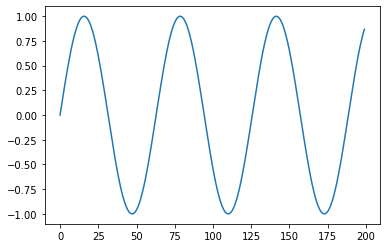

In [156]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(series)
plt.show()

In [157]:
X = []
y = []
T = 25
for i in range(len(series)-T):
    X.append(series[i:i+T])
    y.append(series[i+T])

In [158]:
X= np.expand_dims(X, -1)
y = np.array(y)
X.shape, y.shape

((175, 25, 1), (175,))

In [159]:
model = RNN((T, 1), 5, 1, 'none')

In [160]:
model.compile_network('mse')

In [161]:
N = X.shape[0]

model.fit( X[:N//2], y[:N//2], validation_data=[X[N//2:], y[N//2:]], epochs=100, batch_size=8, learning_rate=0.01)


Epoch 1 ==> mse: 8.927930454668115 val_mse: 7.8277340755557585 
Epoch 2 ==> mse: 11.754151743076468 val_mse: 9.601109100314812 
Epoch 3 ==> mse: 13.172441710650952 val_mse: 11.487514021091009 
Epoch 4 ==> mse: 15.357873151922286 val_mse: 14.061217260131848 
Epoch 5 ==> mse: 18.86309074721889 val_mse: 19.31518446550319 
Epoch 6 ==> mse: 18.02250576767139 val_mse: 17.533984396015594 
Epoch 7 ==> mse: 17.22858161220912 val_mse: 16.66092530221209 
Epoch 8 ==> mse: 12.150015669698679 val_mse: 9.213367581499398 
Epoch 9 ==> mse: 5.989110878917217 val_mse: 4.448709675533707 
Epoch 10 ==> mse: 0.9612113222886662 val_mse: 0.9972227074622239 
Epoch 11 ==> mse: 0.8627498037718935 val_mse: 0.9235148232910142 
Epoch 12 ==> mse: 0.42432417423885566 val_mse: 0.43380047697380814 
Epoch 13 ==> mse: 0.3529808901217342 val_mse: 0.33009288076271126 
Epoch 14 ==> mse: 0.40739383204578966 val_mse: 0.44221122065626073 
Epoch 15 ==> mse: 0.41327477759572256 val_mse: 0.33301143257981025 
Epoch 16 ==> mse: 0.4

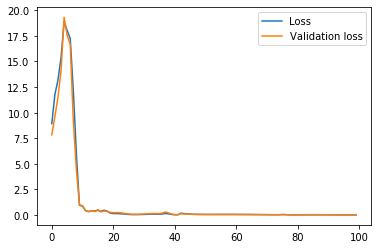

In [162]:
plt.plot(model.history['mse'], label='Loss')
plt.plot(model.history['val_mse'], label='Validation loss')
plt.legend()
plt.show()

In [163]:
model.predict(X[N//2:]).shape

(88, 1)

In [164]:
len(model.predict(X[N//2:], return_sequences=True))

25

In [165]:
model.predict(X[N//2:], return_sequences=True)[0].shape

(88, 1)

<function matplotlib.pyplot.show(*args, **kw)>

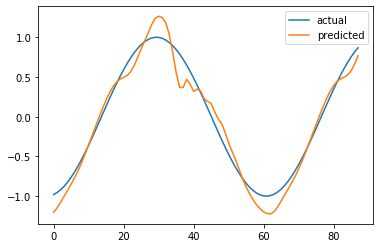

In [166]:
y_hat = model.predict(X[N//2:])
plt.plot(y[N//2:], label='actual')
plt.plot(y_hat, label='predicted')
plt.legend()
plt.show

In [167]:
model.view_hidden_state().shape

(88, 5)

In [168]:
len(model.view_hidden_state(view_all=True))

26

In [169]:
model.view_hidden_state(view_all=True)[0].shape

(88, 5)

In [170]:
model.evaluate(X[N//2:], y[N//2:])

Root mean square error: 0.14135748451111002
R2 score: 0.95723041496608
